# Training linear probes

## Initialisation

In [1]:
import torch
from boardGPT.nn.register import ActivationRecorder
from boardGPT.utils import load_safetensors
from IPython.display import HTML

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = load_safetensors("../../out/safetensors/model.safetensors", "../out/safetensors/config.json")
model = model.to(device)
model.set_flash(False)

Loading weights from safetensors file: ../out/safetensors/model.safetensors
Successfully loaded weights from ../out/safetensors/model.safetensors


## Get residuals

In [3]:
game = ['c4', 'c3']
moves, ret_list = model.generate_moves(
    sequence=game,
    max_new_tokens=1,
    device=device,
    to_return=[
        "residuals0", "residuals1", "residuals2", "residuals3", "residuals4", "residuals5", "residuals6", "residuals7"
    ],
)

/home/schaetti/Projets/CODING/boardGPT/boardGPT/utils/viz.py:527: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


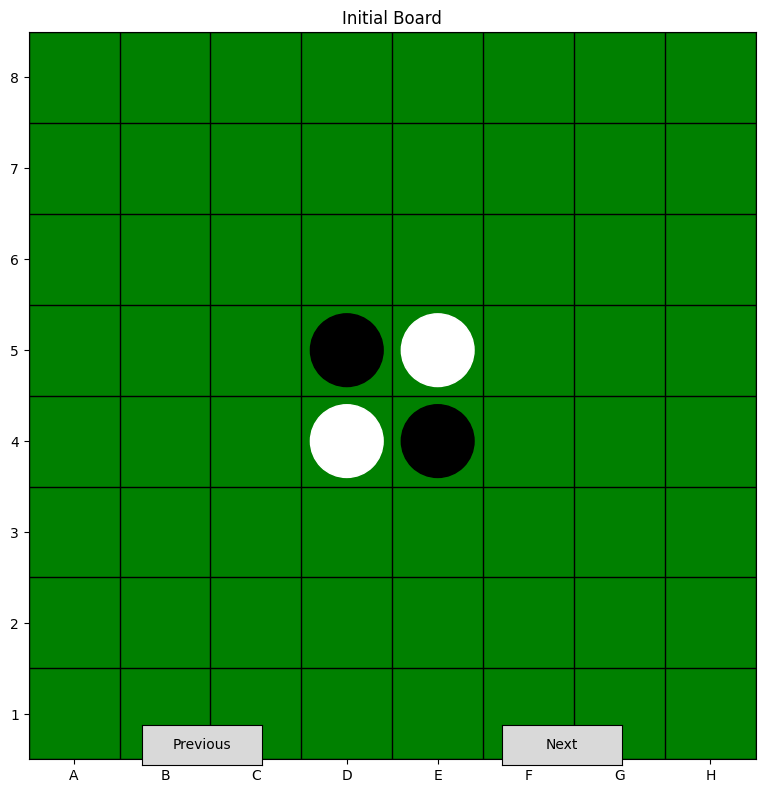

In [11]:
from boardGPT.utils import plot_othello_game
ani = plot_othello_game(moves)
HTML(ani.to_jshtml())

In [5]:
residuals = torch.cat(ret_list[0], dim=0)

In [6]:
residuals = residuals.cpu()
residuals = residuals.view(-1, 512)
residuals.size()

torch.Size([24, 512])

## Linear prob

In [7]:
# Probe linéaire
import torch.nn as nn
probe = nn.Linear(512, 64 * 3)

In [8]:
logits = probe(residuals)
logits = logits.view(8, len(game)+1, 64, 3)

## Loading the dataset

In [9]:
from boardGPT.utils import game_to_board
labels = game_to_board(game)

pos: a1
pos: a2
pos: a3
pos: a4
pos: a5
pos: a6
pos: a7
pos: a8
pos: b1
pos: b2
pos: b3
pos: b4
pos: b5
pos: b6
pos: b7
pos: b8
pos: c1
pos: c2
pos: c3
pos: c4
pos: c5
pos: c6
pos: c7
pos: c8
pos: d1
pos: d2
pos: d3
pos: d4
pos: d5
pos: d6
pos: d7
pos: d8
pos: e1
pos: e2
pos: e3
pos: e4
pos: e5
pos: e6
pos: e7
pos: e8
pos: f1
pos: f2
pos: f3
pos: f4
pos: f5
pos: f6
pos: f7
pos: f8
pos: g1
pos: g2
pos: g3
pos: g4
pos: g5
pos: g6
pos: g7
pos: g8
pos: h1
pos: h2
pos: h3
pos: h4
pos: h5
pos: h6
pos: h7
pos: h8


In [10]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]